# Void-Dislocation Interaction Test Case

Based on the analytical solution provided by Gavazza & Barnett (1974), and the implementation in Takahashi and Ghoniem (2008), we have the testcase as following:

* The solution of the stress:
$$
\tau_{yz}(t,0,z)=
\sum_{n=1}^\infty\left\{-a^{n+1}(2\mu_1\alpha_n+\mu_1\beta_n)+6\mu_1K_n\Omega_n\frac{2n+1}{2n+5}\right\}
    {1\over r^{n+2}}P^{n-1}_{n+1}
$$

$$ +
\sum_{n=1}^\infty\left\{-{1\over2}\mu_1a^{n+1}\beta_n+\mu_1K_n\Omega_n\frac{2n+3}{2n+5}\right\}
    {1\over r^{n+2}}P^{n+1}_{n+1}
$$

$$ +
\sum_{n=1}^\infty\left\{2\mu_1\left({a^2\over r^2}-1\right)K_n\Omega_n+\mu_1K_n\Omega_n\frac{2}{2n+5}\right\}
    {1\over r^{n+2}}P^{n+1}_{n+3}
$$

$$ +
\sum_{n=1}^\infty\left\{24\mu_1\left({a^2\over r^2}-1\right)K_n\Omega_n+\mu_1K_n\Omega_n\frac{24}{2n+5}\right\}
    {1\over r^{n+2}}P^{n-1}_{n+3}
$$

where,
$$
K_n=-\frac{\lambda_1 + \mu_1}{2[(n+2)\lambda_1+(3n+5)\mu_1]}
$$

$$
\Omega_n=\frac{2\eta_n(\mu_1-\mu_2)a^{2n+1}/t^n}{\mu_1[(n+2)+E_n^I(2n+1)(n+1)]+\mu_2(2n)}
$$

$$
\alpha_n=\frac{(\mu_1-\mu_2)\eta_n}{\mu_1(n+2)+\mu_2(n-1)}
\frac{\mu_1\{(n+2)-E_n^I(2n+1)(n-1)\}}{\mu_1{(n+2)+E_n^I(2n+1)(n+1)}+\mu_2(2n)}
\left({a\over t}\right)^n
$$

$$
\beta_n=\frac{(\mu_2-\mu_1)\eta_n}{\mu_1(n+2)+\mu_2(n-1)}
\frac{\mu_1\{(n+2)+E_n^I(2n+1)(n-1)\}+2\mu_2(n-1)}{\mu_1{(n+2)+E_n^I(2n+1)(n+1)}+\mu_2(2n)}
\left({a\over t}\right)^n
$$

$$
\eta_n=\left(b\over4\pi\right)\frac{(-1)^n2^n(n-1)!}{(2n-1)!}
$$

$$
E_n^I=\frac{1}{2n+1}\frac{(n-1)\lambda_1-(n+4)\mu_1}{(n+2)\lambda_1+(3n+5)\mu_1}
$$

$P_l^m$ is the *unnormalized Legendre Polynomial* with *Condon-Shortley Phase* coefficients.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pyshtools
import sys, os
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHCilmToVector, lmk2K, K2lmk
from SHTest import gavazza1974

[[-1.83475557e-03 -1.30113965e-03 -9.45553837e-04 -7.09185252e-04
  -5.51454440e-04 -4.41503672e-04 -3.58698915e-04 -2.89870771e-04
  -2.39341981e-04 -2.02935187e-04 -1.66904943e-04 -1.06633838e-04
  -6.71862441e-05 -3.92569871e-05 -2.21224822e-05 -1.36125393e-05
  -9.31759425e-06 -6.18232821e-06 -4.27951366e-06 -4.08127499e-06]]
[[13.53035958 13.60536058 13.88286301 14.04797122 14.20001058 13.84274326
  13.87702846 14.09186746 14.34265243 13.53233626 13.99206238 13.55994334
  13.42053031 13.5427718  16.73408771 17.84445382 23.35057123 14.68682461
  23.7429193  33.68929584]]


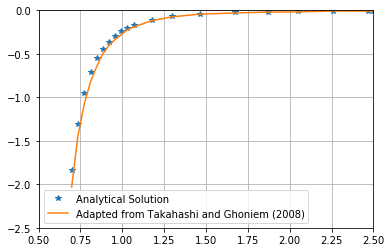

In [2]:
#### Takahashi & Ghoniem (2010) ####
mu1 = 81.8
mu2 = 54.6
nu1 = 0.3
nu2 = 0.25
a = 1.25
b = 0.248

tau_test = loadmat('../testdata/test_takahashi.mat')['Data001']

nmax = 100
zs = np.array([0, ])
ts = tau_test[:, 0]*a*2 #np.linspace(a+2*b, 5*a, 20)

tau_yz = gavazza1974(nmax, zs, ts, mu1, mu2, nu1, nu2, a, b)

print(tau_yz/mu1)
print(tau_test[:,1]/tau_yz)

plt.plot(ts/a/2, tau_yz.T/mu1*1000, '*')
plt.plot(tau_test[:,0], tau_test[:,1])
plt.xlim(0.5,2.5)
plt.ylim(-2.5, 0)
plt.grid(True)
plt.legend(['Analytical Solution', 'Adapted from Takahashi and Ghoniem (2008)'])
#plt.savefig('SHanalytical.png', transparent=True)
plt.show()

### Long range Esitimation

The long range esitimation given by Gavazza&Barnett(1974):

$$
f_x^\infty(t,0,z)=\frac{5\gamma b^2\mu_1a^3}{2\pi t}{1\over r^3}\left(1-2\nu_1+3\nu_1\frac{z^2}{r^2}\right)
$$

where 
$$
\gamma=\frac{\Gamma-1}{2\Gamma(4-5\nu_1)+7-5\nu_1},\quad \Gamma={\mu_2\over\mu_1}
$$

### Analytical solution implementation by Willis et al. (1972)

The void-dislocation interaction energy is given:

$$
E = -\frac{\mu b^2a}{4\pi}\sum_{n=1}^\infty \left({2a\over d}\right)^{2n}\frac{(n-1)!n!}{(2n+1)!}
    \left[1+\frac{(n+1)+2mn}{n+2}\right]
$$

where $m = (6-n)/(3n^2+7n+6)$

The force term is:

$$
F_1 = {\mu b^2\over2\pi a}\sum_{n=1}^\infty\frac{(-1)^n2^nn!}{(2n)!}\left(a^2\over rd\right)^nz
    \left\{P_{n+1}^{n-1}(\cos\theta)\left(\frac{1+(2n-1)m}{n+2}\right)
          -\frac{1+m}{2(n+2)}P_{n+1}^{n+1}(\cos\theta)
          +{3\over l}cos\theta(P_{n+2}^{n+1}(\cos\theta)+P_{n+2}^{n-1}(\cos\theta))
          -{6\over l}(1-z)(P_{n+3}^{n+1}(\cos\theta)+12P_{n+3}^{n-1}(\cos\theta))
    \right\}
$$

where $z=(a/r)^2$ and $l=2(3n^2+7n+6)$

In [3]:
from SHTest import willis1972
from scipy.special import factorial

d = np.linspace(1.5, 3.0)
a = 1
a_d = a/d
nmax = 41
x3 = np.linspace(0, 20)

F1, Fa, F, E = willis1972(a, d, nmax, x3)

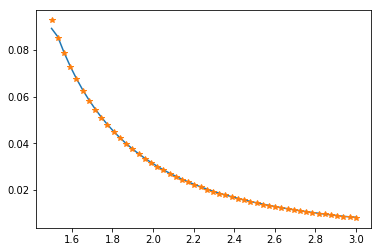

In [4]:
#print(d.shape, E.shape, F.shape)
#print(E)
Ep = np.gradient(E, d)

plt.plot(d, Ep)
plt.plot(d, 2*F, '*')
plt.show()

[-0.19925548 -0.18373509 -0.14713595 -0.10790719 -0.07674673 -0.05491023
 -0.04014536 -0.03017346 -0.02334568 -0.01855309 -0.01508362 -0.01249272
 -0.01050295 -0.00893772 -0.00768151 -0.00665642 -0.00580839 -0.00509881
 -0.00449942 -0.00398906 -0.00355149 -0.0031741  -0.0028469  -0.00256186
 -0.0023125  -0.00209348 -0.00190043 -0.00172967 -0.00157816 -0.00144333
 -0.00132298 -0.00121528 -0.00111865 -0.00103173 -0.00095336 -0.00088253
 -0.00081839 -0.00076018 -0.00070724 -0.000659   -0.00061496 -0.00057468
 -0.00053778 -0.00050392 -0.00047279 -0.00044413 -0.00041771 -0.0003933
 -0.00037074 -0.00034984]


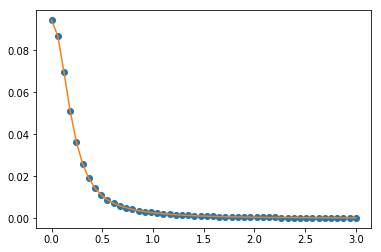

In [5]:
a = 40
t = a*1.01
b = 1
mu = 1
nu = 1./3
x3zT= np.linspace(0, 3, 50)
x3z = np.linspace(0, 3, 50)
tau_yz = gavazza1974(40, x3zT*a, [t, ], mu, 0, nu, nu, a, b)
F1, Fa, F, E = willis1972(a, t, 40, x3z*a, mu, b)
plt.plot(x3zT, -tau_yz, 'o')
plt.plot(x3z, F1.flatten())
print(tau_yz.flatten()*b/np.sum(F1[:, :], axis=1))
plt.show()

## Implementation of ShElastic Solution

First we import the libraries we developed:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools
import sys
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHCilmToVector, lmk2K, K2lmk, plotfv

Then we generate the meshgrid on the void surface for boundary conditions. 

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

#### Gavazza & Barnett (1974) ####
mu = 2.65
nu = 0.347
a = 1
b = 1
t = ts[0]

#### Willis, Hayns & Bullough (1972) ####
r0 = 1 #r0= 1.25

mu0 = 1 #mu0= 81.8        # GPa
nu = 1./3 #nu = 0.305
b0 = 1 #b0 = 0.25
t0= 1.5*r0
x0 = np.linspace(0, 3, 30)*r0

mu= mu0/mu0
a = 1.0
b = b0/r0
t = t0/r0
x3= x0/r0

# zs = np.linspace(0,6,50)
# ts = [t, ]

#### traction mode matrix info ####
modepath = '../module/default_modes'
lJmax = 43 # max l degree for saving a single mode
lKmax = 40 # max cutoff l degree for modes
LJ = (lJmax+1)**2
LK = (lKmax+1)**2

#### create meshgrid for evaluation ####
## DH2 mesh
#Ngrid = 100
#theta = (np.arange(0,Ngrid)+0.0)/Ngrid*(np.pi)
#phi = (np.arange(0,2*Ngrid)+0.0)/(2*Ngrid)*(2*np.pi)
## GLQ mesh
latglq, longlq = pyshtools.expand.GLQGridCoord(lJmax)
theta = np.deg2rad(90 - latglq)
phi = np.deg2rad(longlq)

THETA,PHI = np.meshgrid(theta, phi)
R = np.ones_like(THETA)
X, Y, Z = SphCoord_to_CartCoord(R, THETA, PHI)
N = -np.stack((X/R, Y/R, Z/R), axis=-1)

Then we evaluate traction boundary conditions on the spherical surface. We have a spherical void center at the origin with radius $a$, and a RH screw dislocation at $(t,0,0)$, with $\hat{\xi}=\hat{\mathbf{e}}_z$, with a burger's vector magnitude of $b$. The stress field induced by the dislocation in an infinite medium can be written as $\mathbf{\sigma}^\infty$, with the only two non-zero terms:

$$
\sigma_{xz}^\infty = -\frac{\mu b}{2\pi}\frac{y}{(x-t)^2+y^2} \\
\sigma_{yz}^\infty = \frac{\mu b}{2\pi}\frac{x-t}{(x-t)^2+y^2}
$$

(87, 44, 3, 3)
(87, 44, 3)


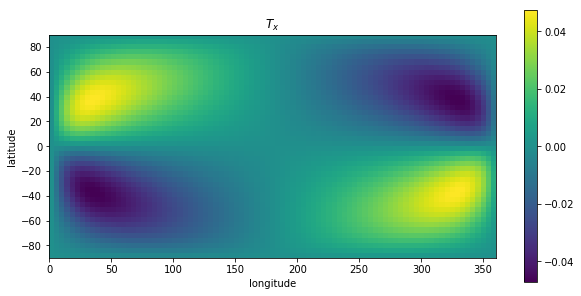

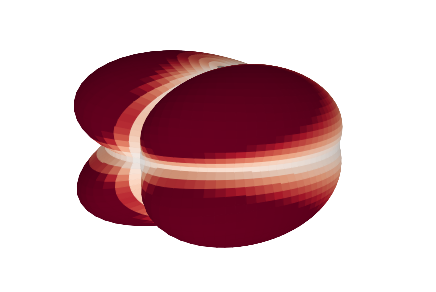

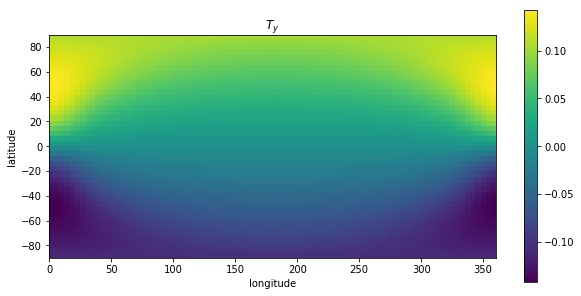

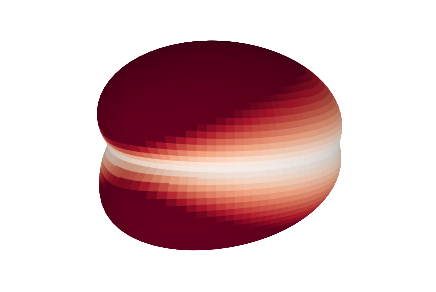

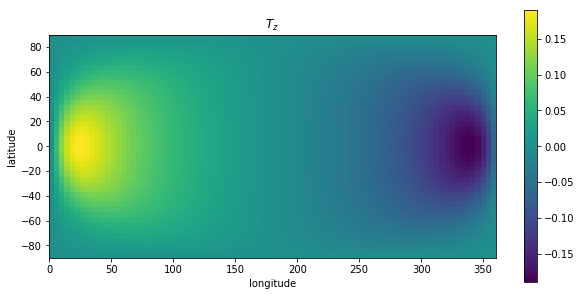

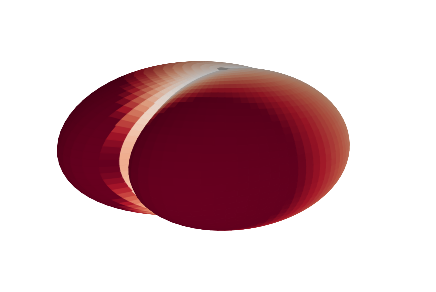

In [8]:
#### generate boundary condition ####
sigma_inf = np.zeros(THETA.shape+(3, 3))
mub = mu*b
sigma_inf[:, :, 0, 2] = -mub/2/np.pi * Y/((X-t)**2+Y**2)
sigma_inf[:, :, 2, 0] = -mub/2/np.pi * Y/((X-t)**2+Y**2)
sigma_inf[:, :, 1, 2] =  mub/2/np.pi * (X-t)/((X-t)**2+Y**2)
sigma_inf[:, :, 2, 1] =  mub/2/np.pi * (X-t)/((X-t)**2+Y**2)

print(sigma_inf.shape)

sigma_0 = sigma_inf; sigma_inf = sigma_0/mu0
T_inf = np.einsum('ijkl,ijl->ijk', sigma_0, N)

T_usr_mesh = T_inf.astype(np.complex)
print(T_usr_mesh.shape)

ttl = ['$T_x$','$T_y$','$T_z$']
T_usr_vec = np.empty(3*LJ, dtype=np.complex)
for k in range(3):
    fig, ax = plotfv(T_usr_mesh[:,:,k].real.T, show=False)
    ax.set_title(ttl[k])
    T_usr_grid = pyshtools.SHGrid.from_array(T_usr_mesh[...,k].T, grid='GLQ')
    T_usr_grid.plot3d(elevation=20, azimuth=45)
    T_usr_cilm = T_usr_grid.expand()
    T_usr_vec[LJ*k:LJ*(k+1)] = SHCilmToVector(T_usr_cilm.to_array(), lmax = lJmax)
plt.show()

Then we expand the traction boundary conditions to spherical harmonic modes:

In [9]:
#### load the full and sub matrix ####
import scipy.sparse as spm
from scipy.io import loadmat, savemat, mmwrite
from ShElastic import calSmode
from SHBV import generate_submat, visualize_Cmat

shtype = 'irr'
Tmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'))

Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
fullCmat = calSmode(Tmodes, mu, nu)
#lJfull = 43; lKfull = 40;
Cmat = generate_submat(mu, nu, fullCmat, lKmax, lJmax)

#plt.figure(figsize=(24,24))
#visualize_Cmat(Cmat, precision=1e-8)
#plt.show()

Then we solve for the linear problem:

In [10]:
from SHBV import print_SH_mode
from scipy.sparse.linalg import lsqr
import time

tic = time.time()
A = lsqr(Cmat, T_usr_vec.transpose())
toc = time.time()
print('Residual:', A[3], 'Time:', toc-tic)
A_sol = np.zeros_like(A[0])
A_sol[np.abs(A[0]) > 1e-8] = A[0][np.abs(A[0]) > 1e-8]
print('Solution:', A_sol.size)
#index_sol = print_SH_mode(A_sol, m_dir=3)

Residual: 1.269478819684323e-05 Time: 0.46526026725769043
Solution: 5043


Then we integrate the stress solution:

(87, 44, 3, 3) 25.314562797546387


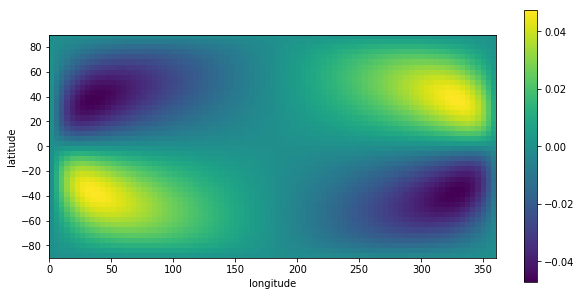

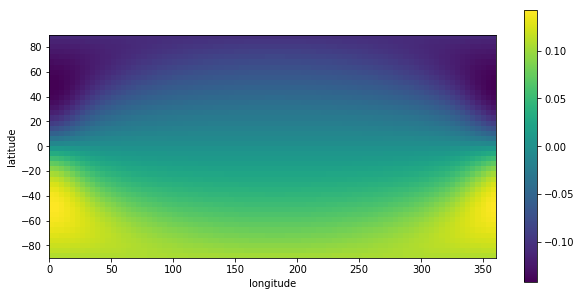

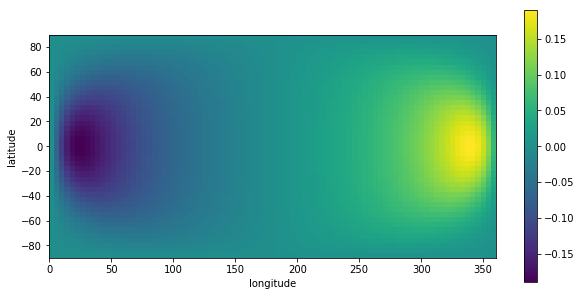

In [11]:
from SHBV import fast_stress_solution

Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
fullSmodes = calSmode(Smodes, mu, nu)
Smodes = generate_submat(mu, nu, fullSmodes, lKmax, lJmax, kJ=9)

tic = time.time()
sigma_tot = fast_stress_solution(A_sol, X, Y, Z, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

T_sol = np.sum(sigma_tot*N[...,np.newaxis,:], axis=-1)

for k in range(3):
    T_sol_grid = pyshtools.SHGrid.from_array(T_sol[...,k].T, grid='GLQ')
    fig, ax = plotfv(T_sol_grid.to_array())
    #T_sol_grid.plot()#3d(elevation=20, azimuth=-45)

In [12]:
from SHBV import fast_stress_solution

xs, ys, zs = np.meshgrid([t, ], [0, ], x3)

Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
fullSmodes = calSmode(Smodes, mu, nu)
Smodes = generate_submat(mu, nu, fullSmodes, lKmax, lJmax, kJ=9)

tic = time.time()
sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

(1, 1, 30, 3, 3) 0.5372369289398193


(1, 1, 30)


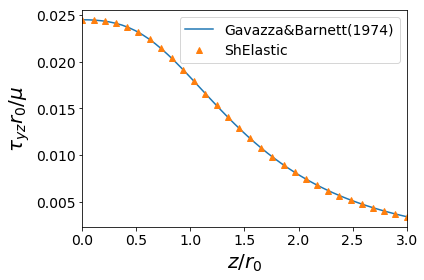

In [13]:
print(sigma_tot[:,:,:,1,2].shape)
tau_ShE = sigma_tot[:,:,:,1,2].flatten()

x3zT= np.linspace(0, 3, 50)*r0
x3z = np.linspace(0, 3, 100)*r0

tau_yz = gavazza1974(50, x3zT, [t0, ], mu0, 0, nu, nu, r0, b0)
#F1, Fa, F = willis1972(r0, t0, 50, x3z,mu=mu0,b=b0)

plt.figure()
plt.plot(x3zT/r0, -tau_yz/mu0*r0, label='Gavazza&Barnett(1974)')
#plt.plot(x3z, np.sum(F1[:, :], axis=1)/b0, '--')
plt.plot(x3, -tau_ShE.flatten()*r0, '^', label='ShElastic')
plt.xlabel(r'$z/r_0$', fontsize=20)
plt.xlim(0, 3)
#plt.ylim(0, 8)
plt.ylabel(r'$\tau_{yz}r_0/\mu$', fontsize=20)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

(16, 2)
(1, 50, 1, 3, 3) 0.8287620544433594
error:  [0.01105648 0.02491742 0.02624854 0.0245494  0.00640513 0.00657469
 0.00553147 0.01007111 0.01303876 0.001314   0.00154976 0.00829354
 0.00373993 0.00639909 0.00333994 0.00370681]


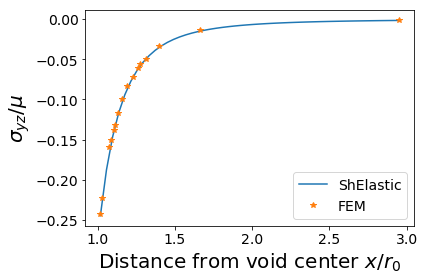

In [14]:
t0 = 1.5*r0

FEM = loadmat('../testdata/screw.mat')['M']
print(FEM.shape)
xrange = np.linspace(FEM[:,0].min(), FEM[:,0].max())

xs, ys, zs = np.meshgrid(xrange, [0, ], [0, ])
tic = time.time()
sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

xs, ys, zs = np.meshgrid(FEM[:, 0], [0, ], [0, ])
sigma_sol = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)[...,1,2].flatten()
plt.plot(xrange, sigma_tot[...,1, 2].flatten(), label='ShElastic')
plt.plot(FEM[:, 0], -FEM[:, 1], '*', label='FEM')
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Distance from void center $x/r_0$', fontsize=20)
plt.ylabel(r'$\sigma_{yz}/\mu$', fontsize=20)
print('error: ', np.abs((sigma_sol+FEM[:,1])/np.abs(sigma_sol).max()))
plt.tight_layout()
#plt.savefig('../figures/case2-FEM.png', transparent=True, dpi=1000)
plt.show()

In [15]:
# save the data to matfile
from scipy.io import savemat, whosmat

n = 2
filename = '../figures/case2-FEM.mat'
obj_x = np.empty((n,), dtype=np.object)
obj_y = np.empty((n,), dtype=np.object)
obj_label = np.empty((n,), dtype=np.object)

obj_x[0], obj_x[1] = (xrange, FEM[:, 0])
obj_y[0], obj_y[1] = (sigma_tot[...,1,2].flatten(), FEM[:, 1])
obj_label[0] = 'ShElastic'
obj_label[1] = 'FEM'

savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
whosmat(filename)
#print(loadmat(filename)['label'])

[('X', (1, 2), 'cell'), ('Y', (1, 2), 'cell'), ('label', (1, 2), 'cell')]

### The convergence of the ShElastic solution

We next generate the solution using different degrees of spherical harmonics to get accuracy curve:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spm
import pyshtools
import sys, os
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHVectorToCilm, SHCilmToVector, lmk2K, K2lmk
from SHBV import fast_stress_solution, generate_submat, fast_energy_solution
from ShElastic import calUmode, calSmode
import time

In [17]:
def visSHVec(xvec, lmax_plot=None, cmap='viridis', show=True, 
             SphCoord=True, config_quiver=(2, 4, 'k', 1), 
             lonshift=0, Complex=False, mesh=False):
    if lmax_plot is None:
        lmax_plot = (np.sqrt(xvec.size/3) - 1).astype(np.int)
    cvec = xvec.reshape(3, -1)
    nvec = cvec.shape[1]
    xmesh= [None for _ in range(3)]
    for k in range(3):
        if Complex:
            cext = np.zeros((lmax_plot+1)**2, dtype=np.complex)
            cext[:nvec] = cvec[k, :]
            cilm = SHVectorToCilm(cext)
        else:
            cext = np.zeros((lmax_plot+1)**2)
            cext[:nvec] = cvec[k, :]
            cilm = pyshtools.shio.SHVectorToCilm(cext)
        coeffs = pyshtools.SHCoeffs.from_array(cilm)
        grid = coeffs.expand('GLQ')
        xmesh[k] = grid.to_array().real
    xmesh = np.stack(xmesh, axis=-1)
    if SphCoord:
        Q = TransMat(lJmax=lmax_plot)
        xmesh = np.sum(Q*xmesh[...,np.newaxis,:], axis=-1)
        
        fig = [None for _ in range(2)]
        ax = [None for _ in range(2)]
        xshear= np.linalg.norm(xmesh[...,1:], axis=-1)
        
        fig[0], ax[0] = plotfv(xmesh[...,0], show=False, cmap=cmap, vrange=(-200, 200), lonshift=lonshift)
        ax[0].set_title('norm')
        
        fig[1], ax[1] = plotfv(xshear, show=False, cmap='Reds', lonshift=lonshift)
        lons, lats = np.meshgrid(grid.lons(), grid.lats())
        xshift = np.roll(xmesh, np.round(lons.shape[1]*lonshift/360).astype(np.int), axis=1)
        st, dq, color, scale = config_quiver
        ax[1].quiver(lons[::dq,st::dq], lats[::dq,st::dq], 
                     xshift[::dq,st::dq,1], xshift[::dq,st::dq,2], 
                     color=color, scale=scale)
        ax[1].set_title('shear')
    else:
        fig = [None for _ in range(3)]
        ax = [None for _ in range(3)]
        titlestr = ('x', 'y', 'z')
        for k in range(3):
            fig[k], ax[k] = plotfv(xmesh[...,k], show=False, cmap=cmap, lonshift=lonshift)
            ax[k].set_title('$'+titlestr[k]+'$')
    if show:
        plt.show()
    if mesh:
        return xmesh
    return fig, ax

In [18]:
def tauyz_ShElastic(lKmax, z0, t0, r0, b0, mu0=None, nu=None, Tmodes=None, Smodes=None, Umodes=None, Tcmodes=None, Ucmodes=None):
    tic = time.time()
    if mu0 is None:
        mu0 = 1.0
    mu = 1.0; r = 1.0; b = b0/r0; t = t0/r0; x3 = z0/r0;
    lJmax = lKmax + 3; LJ = (lJmax+1)**2;
    latglq, longlq = pyshtools.expand.GLQGridCoord(lJmax)
    theta = np.deg2rad(90 - latglq)
    phi = np.deg2rad(longlq)
    THETA,PHI = np.meshgrid(theta, phi)
    R = np.ones_like(THETA)
    X, Y, Z = SphCoord_to_CartCoord(R, THETA, PHI)
    N = -np.stack((X/R, Y/R, Z/R), axis=-1)
    print('constructing grids...', N.shape)
    
    u_inf = np.zeros(THETA.shape + (3, ))
    u_inf[..., 2] = np.arctan2(Y, (X-t))
    u_inf[u_inf < 0] += 2*np.pi
    u_inf *= b/2/np.pi
    u_inf[...,2] -= b/2

    sigma_inf = np.zeros(THETA.shape+(3, 3))
    sigma_inf[..., 0, 2] = -mu*b/2/np.pi * Y/((X-t)**2+Y**2)
    sigma_inf[..., 2, 0] =  sigma_inf[..., 0, 2]
    sigma_inf[..., 1, 2] =  mu*b/2/np.pi * (X-t)/((X-t)**2+Y**2)
    sigma_inf[..., 2, 1] =  sigma_inf[..., 1, 2]
    print('calculating infinite stress field...', sigma_inf.shape)

    T_inf = np.einsum('ijkl,ijl->ijk', sigma_inf, N)
    T_usr_mesh = T_inf.astype(np.complex)
    T_usr_vec = np.empty(3*LJ, dtype=np.complex)
    for k in range(3):
        T_usr_grid = pyshtools.SHGrid.from_array(T_usr_mesh[...,k].T, grid='GLQ')
        #plotfv(T_inf[...,k].T)
        T_usr_cilm = T_usr_grid.expand()
        T_usr_vec[LJ*k:LJ*(k+1)] = SHCilmToVector(T_usr_cilm.to_array(), lmax = lJmax)
    toc = time.time()
    print('setting up the boundary condition...', toc-tic)

    tic = time.time()
    if Tmodes is None:
        shtype = 'irr'; Tmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'));
        Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
    if Smodes is None:
        Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
        Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
    if not (nu is None):
        Tmodes = calSmode(Tmodes, mu, nu)
        Smodes = calSmode(Smodes, mu, nu)
        Umodes = calUmode(Umodes, mu, nu)
    Cmat = generate_submat(mu, nu, Tmodes, lKmax, lJmax, kJ=3)
    Smodes = generate_submat(mu, nu, Smodes, lKmax, lJmax, kJ=9)
    toc = time.time()
    print('construct the traction matrix for solving...', toc-tic)

    tic = time.time()
    A = spm.linalg.lsqr(Cmat, T_usr_vec.T)
    toc = time.time()
    solve_time=toc-tic
    print('Residual:', A[3], 'Solving time:', toc-tic)
    A_sol = np.zeros_like(A[0])
    a_err = 1e-10
    A_sol[np.abs(A[0]) > a_err] = A[0][np.abs(A[0]) > a_err]
    n_active = A_sol.nonzero()[0].size
    print('Solution:', A_sol.size, 'Active modes:', n_active)

    xs, ys, zs = np.meshgrid([t, ], [0, ], x3)
    tic = time.time()
    sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
    toc = time.time()
    reconstruct_time=toc-tic
    print('reconstruction time:', toc-tic)

    if Umodes is not None:
        Dmat = generate_submat(mu, nu, Umodes, lKmax, lJmax)
        if Ucmodes is not None:
            Dcmat = generate_submat(mu, nu, Ucmodes, lKmax, lJmax)
            Ccmat = generate_submat(mu, nu, Tcmodes, lKmax, lJmax)
            Ac = spm.linalg.lsqr(Ccmat, -T_usr_vec.T)
            #U_usr_vec = Dcmat.dot(Ac[0])
            #umesh = visSHVec(U_usr_vec, SphCoord=False, mesh=True, Complex=True)
            #print(umesh[0,0,1], Z[0,0])
            #A = umesh[0,0,1]/Z[0,0]
            #umesh[:,:,1] -= A*Z.T
            #umesh[:,:,2] += A*Y.T
            #plotfv(umesh[...,1])
            #print('uzinf')
            #plotfv(umesh[...,2])
            #plotfv(u_inf[...,0].T)
            #plotfv(u_inf[...,1].T)
            #print('uzinf-uzref')
            #plotfv(umesh[...,2]-u_inf[...,2].T)
            E_el = fast_energy_solution(A[0], Dmat, Cmat, Ac_sol=Ac[0], Dcmat=Dcmat, Ccmat=Ccmat)
            return (sigma_tot*mu0, n_active, E_el*mu0*r0**3, solve_time, reconstruct_time)
        else:
            E_b = fast_energy_solution(A[0], Dmat, Cmat)
            return (sigma_tot*mu0, n_active, E_b*mu0*r0**3, solve_time, reconstruct_time)
    else:
        return (sigma_tot*mu0, n_active, solve_time, reconstruct_time)

In [19]:
a = 1.25; b = 0.25; t = 1.5*a; # nm
mu = 52.5; nu = 1./3; 
x3 = np.linspace(0, 3)

analytical = gavazza1974(80, x3*a, [t, ], mu, 0, nu, nu, a, b)
mode_list = np.arange(30, 0, -1) #np.hstack((np.arange(1, 5), np.arange(5, 41, 5)))[::-1]
fx_list = []
active_list = []
solve_time = []
reconstruct_time = []
error_list = []
shtype = 'irr'
Tmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'))
Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
Tmodes = calSmode(Tmodes, mu, nu)
Smodes = calSmode(Smodes, mu, nu)

for lKmax in mode_list:
    print('lKmax =', lKmax)
    sigma, act_mode, tsolve, tconstruct = tauyz_ShElastic(lKmax, x3*a, t, a, b, mu0=mu, Tmodes=Tmodes, Smodes=Smodes)
    err = np.absolute((sigma[:,:,:,1,2].flatten()-analytical.flatten())/analytical.flatten()).max()
    print('relative error =', err)
    error_list.append(err)
    fx_list.append(sigma)
    active_list.append(act_mode)
    solve_time.append(tsolve)
    reconstruct_time.append(tconstruct)

lKmax = 30
constructing grids... (67, 34, 3)
calculating infinite stress field... (67, 34, 3, 3)
setting up the boundary condition... 0.03865337371826172
construct the traction matrix for solving... 0.060250282287597656
Residual: 1.0833993440965514e-06 Solving time: 0.30060887336730957
Solution: 2883 Active modes: 343
reconstruction time: 0.46402740478515625
relative error = 3.952149441232727e-06
lKmax = 29
constructing grids... (65, 33, 3)
calculating infinite stress field... (65, 33, 3, 3)
setting up the boundary condition... 0.006720781326293945
construct the traction matrix for solving... 0.02502584457397461
Residual: 1.0736697747794268e-06 Solving time: 0.14301395416259766
Solution: 2700 Active modes: 369
reconstruction time: 0.51997971534729
relative error = 4.061202283551023e-06
lKmax = 28
constructing grids... (63, 32, 3)
calculating infinite stress field... (63, 32, 3, 3)
setting up the boundary condition... 0.012486696243286133
construct the traction matrix for solving... 0.0

reconstruction time: 0.11636757850646973
relative error = 0.00171588025316657
lKmax = 9
constructing grids... (25, 13, 3)
calculating infinite stress field... (25, 13, 3, 3)
setting up the boundary condition... 0.005653858184814453
construct the traction matrix for solving... 0.015553474426269531
Residual: 0.00042995553370416424 Solving time: 0.007794380187988281
Solution: 300 Active modes: 133
reconstruction time: 0.08806967735290527
relative error = 0.0037826889947836476
lKmax = 8
constructing grids... (23, 12, 3)
calculating infinite stress field... (23, 12, 3, 3)
setting up the boundary condition... 0.0035521984100341797
construct the traction matrix for solving... 0.01445770263671875
Residual: 0.0006933682179940347 Solving time: 0.006435394287109375
Solution: 243 Active modes: 108
reconstruction time: 0.12370800971984863
relative error = 0.008243910118468983
lKmax = 7
constructing grids... (21, 11, 3)
calculating infinite stress field... (21, 11, 3, 3)
setting up the boundary cond

[('X', (1, 5), 'cell'), ('Y', (1, 5), 'cell'), ('label', (1, 5), 'cell')]


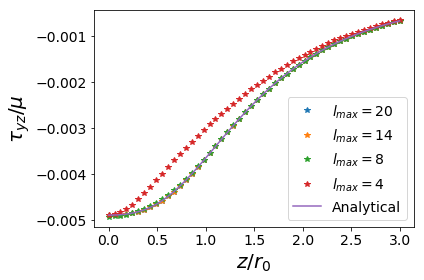

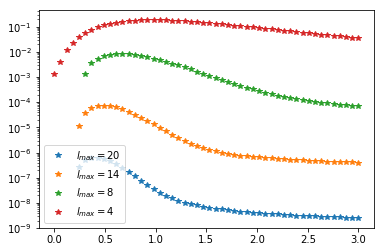

In [20]:
# save the data to matfile
from scipy.io import savemat, whosmat

filename = '../figures/case2-result.mat'
n = 5
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)

plt_idx = [10, 16, 22, 26] #[4,5,6,7]
#total_time = np.array()
plt.figure()
for i in range(4):
    obj_x[i] = x3.copy()
    obj_y[i] = fx_list[plt_idx[i]][...,1,2].flatten()/mu
    obj_label[i] = r'l_{max} = %i'%mode_list[plt_idx[i]]
    plt.plot(x3, fx_list[plt_idx[i]][...,1,2].flatten()/mu, '*', label=r'$l_{max} = %i$'%mode_list[plt_idx[i]])

obj_x[-1] = x3.copy(); obj_y[-1] = analytical/mu; obj_label[-1] = 'Analytical'
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))
    
plt.plot(x3, analytical/mu, label='Analytical')
plt.legend(fontsize=14)
plt.xlabel(r"$z/r_0$", fontsize=20)
plt.ylabel(r'$\tau_{yz}/\mu$', fontsize=20)
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case2-result.png', dpi=1000, transparent=True)
plt.figure()
for i in plt_idx:
    sigma = fx_list[i]
    plt.semilogy(x3, -(sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten(), '*',  label=r'$l_{max} = %i$'%mode_list[i])
plt.legend()
#plt.savefig('figures/case2-result-semilog.png', dpi=1000)
plt.show()

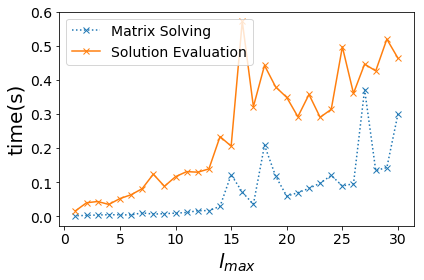

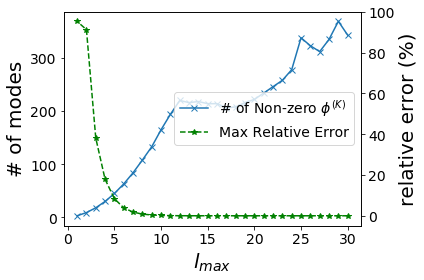

In [21]:
plt.figure()
plt.plot(mode_list, solve_time, ':x', label='Matrix Solving')
plt.plot(mode_list, reconstruct_time, '-x', label='Solution Evaluation')
plt.xlabel('$l_{max}$', fontsize=20)
plt.ylabel('time(s)', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case3-time.png', dpi=1000, transparent=True)

error_list = []
for sigma in fx_list:
    error_list.append((-(sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten()).max())

fig, ax1 = plt.subplots()
ln1 = ax1.plot(mode_list, active_list, '-x')
ax1.set_xlabel('$l_{max}$', fontsize=20)
ax1.set_ylabel('# of modes', fontsize=20)
ax2 = ax1.twinx()
ln2 = ax2.plot(mode_list, np.array(error_list)*100, '--*g', label='relative error')
ax2.set_ylabel('relative error (%)', fontsize=20)

ax1.legend(ln1+ln2, [r'# of Non-zero $\phi^{(K)}$','Max Relative Error'], loc='right', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case3-err.png', dpi=1000, transparent=True)
plt.show()

[('X', (1, 4), 'cell'), ('Y', (1, 4), 'cell'), ('label', (1, 4), 'cell')]


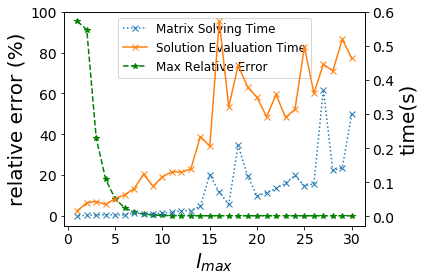

In [22]:
filename = '../figures/case2-err.mat'
n = 4
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)
obj_x[0], obj_x[1], obj_x[2], obj_x[3] = \
    (np.array(mode_list), np.array(mode_list), np.array(mode_list), np.array(mode_list))
obj_y[0], obj_y[1], obj_y[2], obj_y[3] = \
    (np.array(error_list), np.array(solve_time), np.array(reconstruct_time), np.array(active_list))
obj_label = np.array(['Max Relative Error', 'Matrix Solving Time',\
                      'Solution Evaluation Time', 'Active Mode Number'], dtype=np.object)
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))

fig, ax1 = plt.subplots()
ln3 = ax1.plot(mode_list, np.array(error_list)*100, '--*g')
ax1.set_ylabel('relative error (%)', fontsize=20)
ax1.set_xlabel('$l_{max}$', fontsize=20)
ax2 = ax1.twinx()
ln1 = ax2.plot(mode_list, solve_time, ':x')
ln2 = ax2.plot(mode_list, reconstruct_time, '-x')
ax2.set_ylabel('time(s)', fontsize=20)

legends = ['Matrix Solving Time', 'Solution Evaluation Time', 'Max Relative Error']
ax1.legend(ln1+ln2+ln3, legends, loc='upper center', fontsize=12)
#ax2.legend()
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case2-err.png', dpi=1000, transparent=True)
plt.show()

In [23]:
a = 1; b = 1; mu = 1; nu = 1./3;

x3 = np.linspace(0, 3)
ts = np.linspace(3.0, 1.1, 96)*a
lKmax = 20
fx_list = []
active_list = []
solve_time = []
reconstruct_time = []
error_list = []

# load displacement modes for calculating energy
Ucmodes = loadmat(os.path.join(modepath, 'Umodes.mat'))
Ucmodes = (Ucmodes['U1reg'], Ucmodes['U0reg'])
Ucmodes = calUmode(Ucmodes, 1.0, nu)
Tcmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'))
Tcmodes = (Tcmodes['T1reg'], Tcmodes['T2reg'], Tcmodes['T3reg'], Tcmodes['T0reg'])
Tcmodes = calSmode(Tcmodes, 1.0, nu)

Umodes = loadmat(os.path.join(modepath, 'Umodes.mat'))
Umodes = (Umodes['U1irr'], Umodes['U0irr'])
Umodes = calUmode(Umodes, 1.0, nu)
Tmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'))
Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
Tmodes = calSmode(Tmodes, 1.0, nu)
Smodes = calSmode(Smodes, 1.0, nu)
Eel_list = []

for tvalue in ts:
    print('t/a =', tvalue/a)
    sigma, act_mode, E, tsolve, tconstruct = tauyz_ShElastic(lKmax, x3*a, tvalue, a, b, mu0=mu,
                                                             Tmodes=Tmodes, Smodes=Smodes, Umodes=Umodes,
                                                             Tcmodes=Tcmodes, Ucmodes=Ucmodes)
    analytical = gavazza1974(80, x3*a, [tvalue, ], mu, 0, nu, nu, a, b)
    fx_list.append(sigma)
    Eel_list.append(E)
    rel_error = ((sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten()).max()
    error_list.append(rel_error)
    print('max relative error =', rel_error)
    active_list.append(act_mode)
    solve_time.append(tsolve)
    reconstruct_time.append(tconstruct)
    
F1, Fa, F, E = willis1972(a, ts, 41, x3)

t/a = 3.0
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.0057811737060546875
construct the traction matrix for solving... 0.025359153747558594
Residual: 6.888192043997422e-07 Solving time: 0.042350053787231445
Solution: 1323 Active modes: 164
reconstruction time: 0.21872425079345703
max relative error = 6.495633828254154e-07
t/a = 2.98
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.005019426345825195
construct the traction matrix for solving... 0.02000570297241211
Residual: 7.210478405757545e-07 Solving time: 0.03574037551879883
Solution: 1323 Active modes: 167
reconstruction time: 0.21151280403137207
max relative error = 6.833234567369017e-07
t/a = 2.96
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.011067390441894531
construct the traction matrix for sol

reconstruction time: 0.3532900810241699
max relative error = 1.1257005590095623e-06
t/a = 2.58
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.005924701690673828
construct the traction matrix for solving... 0.019891738891601562
Residual: 7.309190464632908e-07 Solving time: 0.03574371337890625
Solution: 1323 Active modes: 217
reconstruction time: 0.3691232204437256
max relative error = 1.1924661385684262e-06
t/a = 2.56
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.004600048065185547
construct the traction matrix for solving... 0.019084692001342773
Residual: 7.771000041018196e-07 Solving time: 0.04802227020263672
Solution: 1323 Active modes: 216
reconstruction time: 0.4004979133605957
max relative error = 1.262915954806059e-06
t/a = 2.54
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up t

reconstruction time: 0.25112199783325195
max relative error = 2.2597922592904975e-06
t/a = 2.16
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.005131244659423828
construct the traction matrix for solving... 0.019547224044799805
Residual: 1.2008595825075186e-06 Solving time: 0.04070305824279785
Solution: 1323 Active modes: 251
reconstruction time: 0.2823457717895508
max relative error = 2.5577099368280646e-06
t/a = 2.14
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.003633260726928711
construct the traction matrix for solving... 0.030170917510986328
Residual: 8.839642708302186e-07 Solving time: 0.03828620910644531
Solution: 1323 Active modes: 221
reconstruction time: 0.252927303314209
max relative error = 2.4307789580669167e-06
t/a = 2.12
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up

reconstruction time: 0.402529239654541
max relative error = 4.117825318799087e-06
t/a = 1.74
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.008557319641113281
construct the traction matrix for solving... 0.052958011627197266
Residual: 1.4499253952910047e-06 Solving time: 0.1216132640838623
Solution: 1323 Active modes: 231
reconstruction time: 0.28934788703918457
max relative error = 4.482023763388394e-06
t/a = 1.72
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.006041765213012695
construct the traction matrix for solving... 0.019322633743286133
Residual: 1.6322104486540598e-06 Solving time: 0.04732942581176758
Solution: 1323 Active modes: 244
reconstruction time: 0.25838351249694824
max relative error = 4.625519398584238e-06
t/a = 1.7
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up th

reconstruction time: 0.7625501155853271
max relative error = 1.3082946593359094e-05
t/a = 1.32
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.01077723503112793
construct the traction matrix for solving... 0.032616376876831055
Residual: 0.00019168535708420113 Solving time: 0.05687594413757324
Solution: 1323 Active modes: 532
reconstruction time: 0.3338491916656494
max relative error = 1.569400156241891e-05
t/a = 1.3
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.009613752365112305
construct the traction matrix for solving... 0.048572540283203125
Residual: 0.00025747323802898994 Solving time: 0.13158869743347168
Solution: 1323 Active modes: 577
reconstruction time: 0.410292387008667
max relative error = 1.4904188275088503e-05
t/a = 1.28
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up th

96
[('X', (1, 3), 'cell'), ('Y', (1, 3), 'cell'), ('YA', (1, 3), 'cell'), ('label', (1, 3), 'cell')]
[('X', (1, 3), 'cell'), ('Y', (1, 3), 'cell'), ('label', (1, 3), 'cell')]


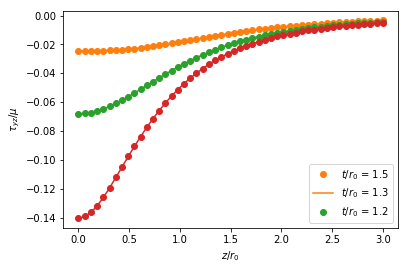

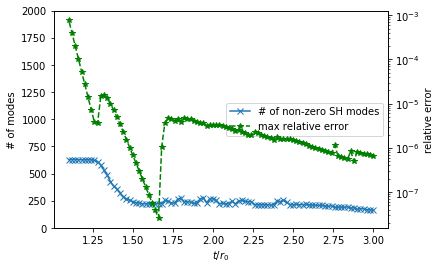

In [24]:
filename = '../figures/case2-result-ts.mat'
print(len(fx_list))
n = 3
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_ya= np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)

plt.figure()
plotlist = [75, 85, 90] #50+np.arange(0, n, dtype=np.int)*40
colors = ['C1', 'C2', 'C3']
for i in range(n):
    obj_x[i] = x3.copy()
    obj_y[i] = fx_list[plotlist[i]][:,:,:,1,2].flatten()
    obj_ya[i]= gavazza1974(80, x3*a, [ts[plotlist[i]], ], mu, 0, nu, nu, a, b).flatten()
    obj_label[i] = '$t/r_0$ = '+str(ts[plotlist[i]]/a)
    plt.plot(x3, fx_list[plotlist[i]][:,:,:,1,2].flatten(), 'o'+colors[i])
    plt.plot(x3, obj_ya[i], colors[i])
legs_t = ['$t/r_0$ = '+str(ts[plotlist[i]]/a) for i in range(n)]
plt.legend(legs_t)
#plt.ylim(0, 3)
plt.xlabel(r'$z/r_0$')
plt.ylabel(r'$\tau_{yz}/\mu$')
#plt.savefig('../figures/case2-result-ts.png', dpi=1000)

savemat(filename, {'X': obj_x, 'Y': obj_y, 'YA':obj_ya, 'label': obj_label})
print(whosmat(filename))

'''
filename = '../figures/case2-err-ts.mat'
n = 2
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_x[0], obj_x[1] = (ts/a, ts/a)
obj_y[0], obj_y[1] = (active_list, np.absolute(error_list))
obj_label = np.array(['Number of Non-zero SH Modes', 'Max Relative Error'], dtype=np.object)
#savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))
'''

Easym = -mu*b**2*a**3/ts**2 *5/np.pi/16
filename = '../figures/case2-E-ts.mat'
n = 3
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_x[0], obj_x[1], obj_x[2] = (ts/a, ts/a, ts/a)
obj_y[0], obj_y[1], obj_y[2] = (Eel_list, Easym, E)
obj_label = np.array(['E^{img}', 'E^{asy}', 'E^{ana}'], dtype=np.object)
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))

fig, ax1 = plt.subplots()
ln1 = ax1.plot(ts/a, active_list, '-x')
ax1.set_ylim(0, 2000)
ax1.set_xlabel('$t/r_0$')
ax1.set_ylabel('# of modes')
ax2 = ax1.twinx()
ln2 = ax2.semilogy(ts/a, np.absolute(error_list), '--*g', label='relative error')
ax2.set_ylabel('relative error')
ax1.legend(ln1+ln2, ['# of non-zero SH modes','max relative error'],loc='right')
#plt.savefig('../figures/case2-error-ts.png', dpi=1000)
plt.show()

(96, 50) (96, 50)


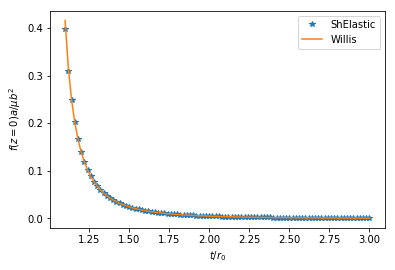

In [25]:
fx = -np.stack(fx_list, axis=0)[...,1,2].squeeze()
print(fx.shape, F1.shape)
plt.plot(ts, fx[:, 0].T, '*')
plt.plot(ts, F1[:, 0])
plt.xlabel('$t/r_0$')
plt.ylabel('$f(z=0)a/\mu b^2$')
plt.legend(['ShElastic', 'Willis'])
plt.show()

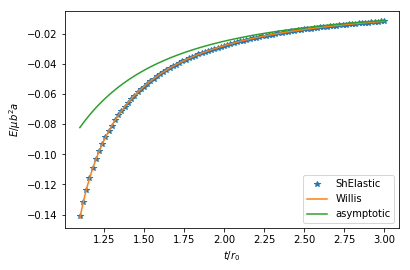

In [26]:
Eimg = np.array(Eel_list)
plt.plot(ts, Eimg, '*')
plt.plot(ts, E)
plt.plot(ts, -1/ts**2 *5/np.pi/16)
plt.xlabel('$t/r_0$')
plt.ylabel('$E/\mu b^2a$')
plt.legend(['ShElastic', 'Willis', 'asymptotic'], loc='lower right')
plt.show()
#print(np.abs((Eimg/E-1)))
#print(np.abs((Easym/E-1))[-40])
#print(Easym.shape)

## Test the calculation time as a function of the \# of nodes to evaluate

In [27]:
a = 1; b = 1; t = 1.2;
mu = 1; nu = 0.25;

lKmax = 16
np_list = (10**(np.linspace(0, 4, 13))).astype(np.int)
fx_list = []
active_list = []
solve_time = []
reconstruct_time = []
error_list = []
shtype = 'irr'
Tmodes = loadmat(os.path.join(modepath, 'Tmodes.mat'))
Smodes = loadmat(os.path.join(modepath, 'Smodes.mat'))
Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
Tmodes = calSmode(Tmodes, 1.0, nu)
Smodes = calSmode(Smodes, 1.0, nu)

for npoints in np_list:
    print('npoints =', npoints)
    x3 = np.linspace(-3, 3, npoints)
    analytical = gavazza1974(30, x3*a, [t, ], mu, 0, nu, nu, a, b)
    
    sigma, act_mode, tsolve, tconstruct = tauyz_ShElastic(lKmax, x3, t, a, b, mu0=mu, Tmodes=Tmodes, Smodes=Smodes)
    err = np.absolute((sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten()).max()
    print('relative error =', err)
    error_list.append(err)
    fx_list.append(sigma)
    active_list.append(act_mode)
    solve_time.append(tsolve)
    reconstruct_time.append(tconstruct)

npoints = 1
constructing grids... (39, 20, 3)
calculating infinite stress field... (39, 20, 3, 3)
setting up the boundary condition... 0.009941577911376953
construct the traction matrix for solving... 0.14469480514526367
Residual: 0.002754586380378017 Solving time: 0.30840587615966797
Solution: 867 Active modes: 408
reconstruction time: 0.5695796012878418
relative error = 0.00013673174388575252
npoints = 2
constructing grids... (39, 20, 3)
calculating infinite stress field... (39, 20, 3, 3)
setting up the boundary condition... 0.005251407623291016
construct the traction matrix for solving... 0.02240133285522461
Residual: 0.002754586380378017 Solving time: 0.03437185287475586
Solution: 867 Active modes: 408
reconstruction time: 0.1694502830505371
relative error = 0.00013673174388575252
npoints = 4
constructing grids... (39, 20, 3)
calculating infinite stress field... (39, 20, 3, 3)
setting up the boundary condition... 0.004096269607543945
construct the traction matrix for solving... 0.0

relative error: 0.006922477685566212


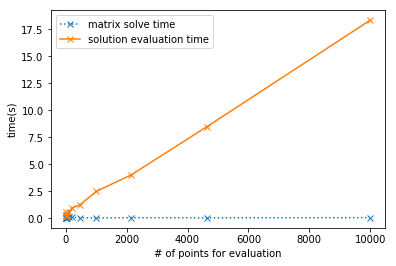

In [28]:
np_list = (10**(np.linspace(0, 4, 13))).astype(np.int)
plt.figure()
plt.plot(np_list, solve_time, ':x', label='matrix solve time')
plt.plot(np_list, reconstruct_time, '-x', label='solution evaluation time')
plt.xlabel('# of points for evaluation')
plt.ylabel('time(s)')
plt.legend()
#plt.savefig('figures/case2-time.png', dpi=1000)

print('relative error:', np.max(error_list))
plt.show()